# 学习笔记20190721-京东手机销售数据分析
参考：
[京东手机销售数据分析](https://www.kaggle.com/ted0001/dm05-998494/#data)

周末学习数据分析内容，顺便熟悉一下python和数据分析相关组件pandas,numpy,matplotbit。偶然看见[实验楼](https://www.shiyanlou.com/)上一篇[文章](https://www.kaggle.com/ted0001/dm05-998494/#data),挺有意思的，用爬虫抓取京东上手机销售数据，分析各品牌销售量，手机性能对价格的影响。找到数据源和代码，重现了一遍
分析过程，并拓展分析了一下各价位手机的价格，各配置手机的价格，给以后买手机有一个参考:)

## 1.环境准备
Python开发经典标配是[Pycharm](https://www.jetbrains.com/pycharm/)和[Anaconda](https://www.anaconda.com/），前者是个Python开发IDE，后者提供数据分析环境（包括各种依赖库）。
按照官网介绍安装完毕后，需要把两者关联起来。Pycharm在选择python解释器时按照下图选择相应解释器，即可关联Anaconda。
![Pycharm配置解释器](pycharm_anaconda_interpreter_setting.png)
实验中的数据可以在[京东手机销售数据分析](https://www.kaggle.com/ted0001/dm05-998494/#data)下载。
除了可以准备本地开发环境，还可以使用在线版的[JupyterLab](https://jupyter.org/try), 直接在上面写python代码，和markdown笔记。内置库很全，随时随地调试代码，非常方便。
[kanggle](https://www.kaggle.com)也是一个在线Jupyter笔记本，上面有很多数据源，波士顿犯罪报告、巴西的油价，可以获取数据挖掘分析。

## 2.数据分析
参考链接[京东手机销售数据分析](https://www.kaggle.com/ted0001/dm05-998494/#data)中的数据分析过程，原文已经讲得很透彻了，不在赘述。在该文基础上，这里做了一些更深入分析，不同价位手机品牌的分布和不同性能手机价格分布。

*1.导入依赖包*

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

*2.导入数据*

In [17]:
data=pd.read_csv('cleaned_data.csv')
data=data.set_index(['Unnamed: 0']) 

*3.绘制不同价位手机品牌分布*

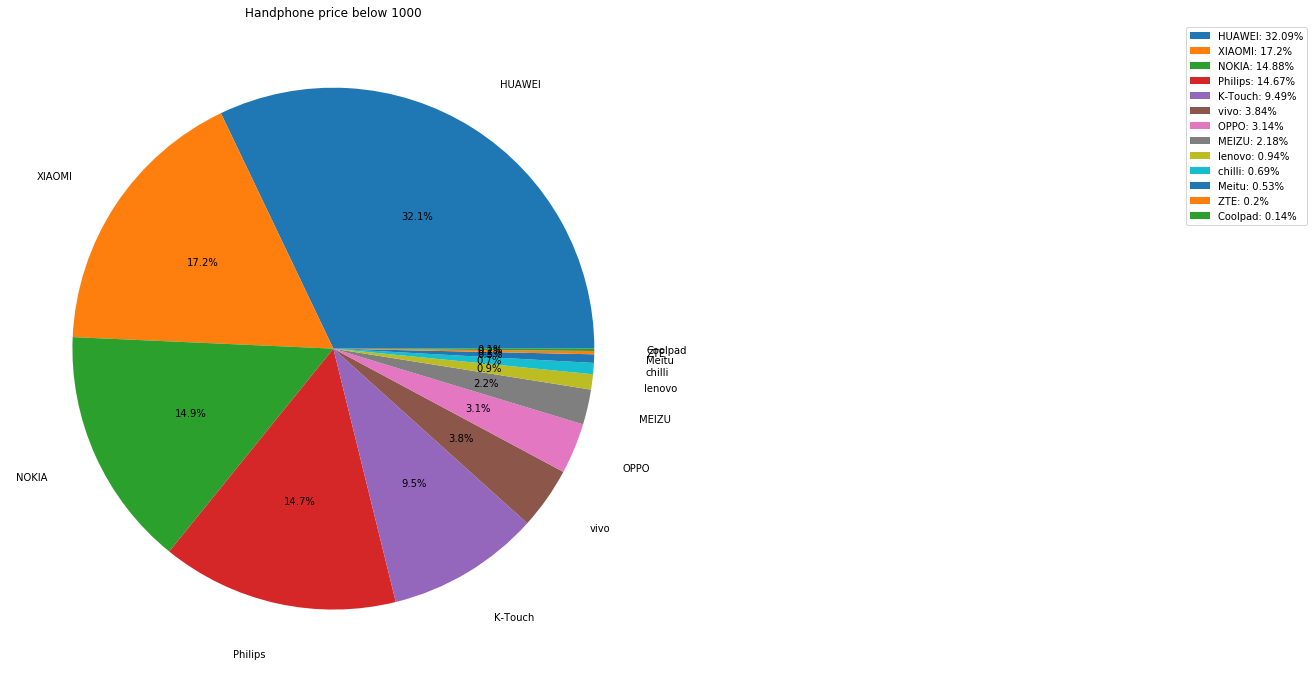

In [18]:
#绘制小于1000元价位手机销量的占比扇形图
pie_plt=data[data['price']<1000].groupby(['brand']).sum()['comments'].sort_values(ascending=False)
fig,axes=plt.subplots(figsize=(12,12))
comment_sum=pie_plt.values.sum()
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
axes.pie(pie_plt.values,labels=pie_plt.index,labeldistance=1.2,autopct = '%3.1f%%')
axes.legend([pie_plt.index[i]+': '+str(percen[i])+"%" for i in range(len(percen))],loc='upper right',bbox_to_anchor=(1, 0, 1, 1))
axes.set_title('Handphone price below 1000')
plt.show()

小米和华为低端机是主流，诺基亚在这个价位还是有点地位的，估计给老人家用吧。

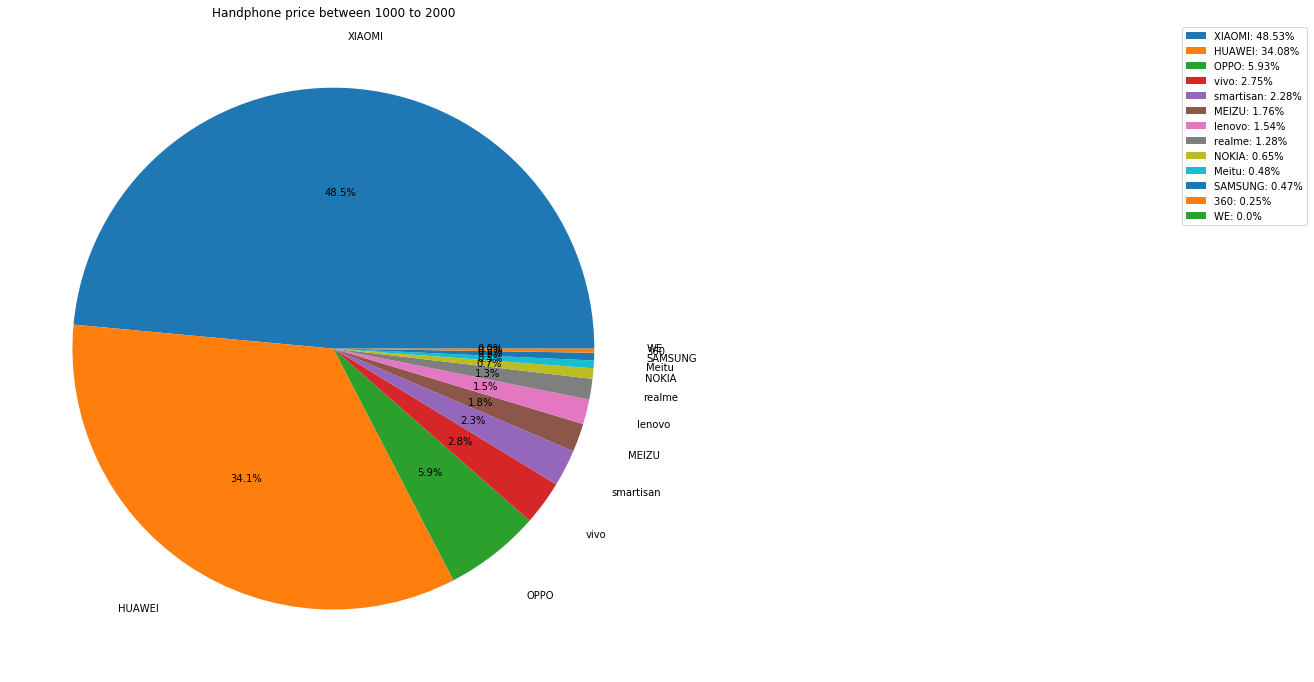

In [19]:
#绘制1000-2000元手机销量的占比扇形图
pie_plt=data[(data['price']>1000) & (data['price']<2000)].groupby(['brand']).sum()['comments'].sort_values(ascending=False)
fig,axes=plt.subplots(figsize=(12,12))
comment_sum=pie_plt.values.sum()
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
axes.pie(pie_plt.values,labels=pie_plt.index,labeldistance=1.2,autopct = '%3.1f%%')
axes.legend([pie_plt.index[i]+': '+str(percen[i])+"%" for i in range(len(percen))],loc='upper right',bbox_to_anchor=(1, 0, 1, 1))
axes.set_title('Handphone price between 1000 to 2000')
plt.show()

1000-2000元手机中，小米和华为占了绝对优势，我就是这个价位的小米手机：-）

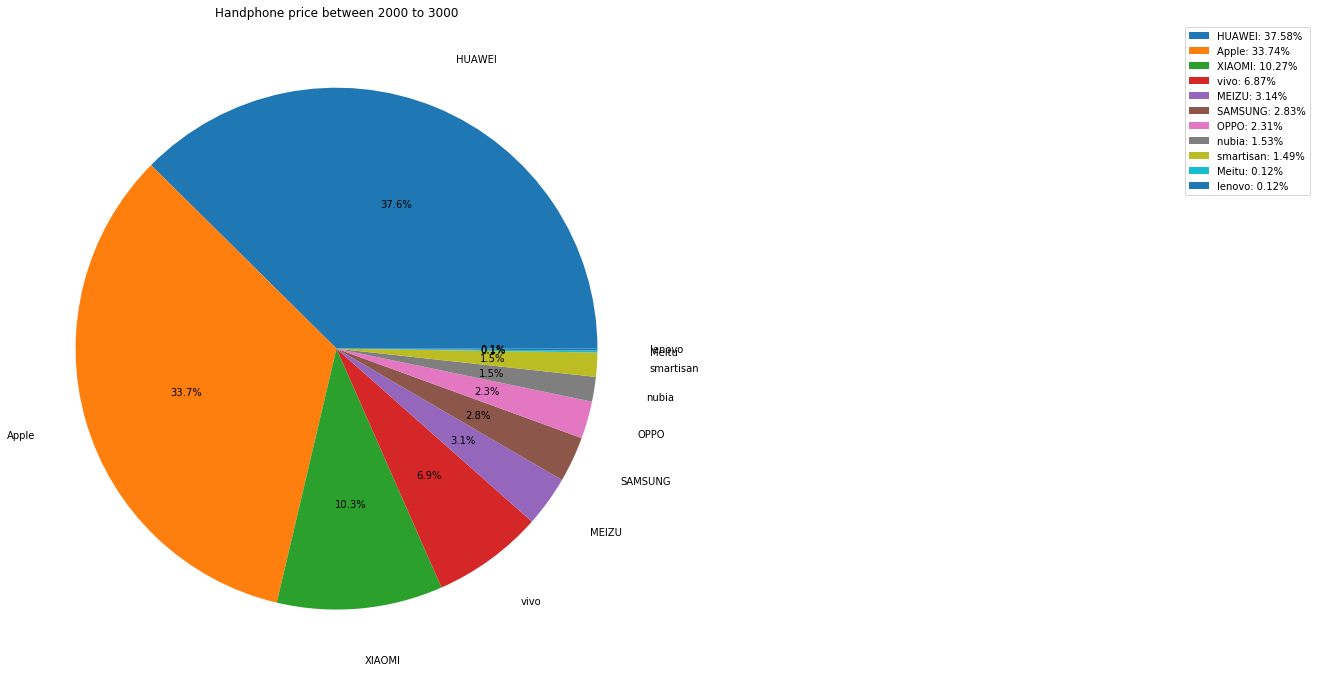

In [20]:
#绘制2000-3000元手机销量的占比扇形图
pie_plt=data[(data['price']>2000) & (data['price']<3000)].groupby(['brand']).sum()['comments'].sort_values(ascending=False)
fig,axes=plt.subplots(figsize=(12,12))
comment_sum=pie_plt.values.sum()
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
axes.pie(pie_plt.values,labels=pie_plt.index,labeldistance=1.2,autopct = '%3.1f%%')
axes.legend([pie_plt.index[i]+': '+str(percen[i])+"%" for i in range(len(percen))],loc='upper right',bbox_to_anchor=(1, 0, 1, 1))
axes.set_title('Handphone price between 2000 to 3000')
plt.show()

苹果手机出场了，这个价位主要是iphone5-7系列手机。

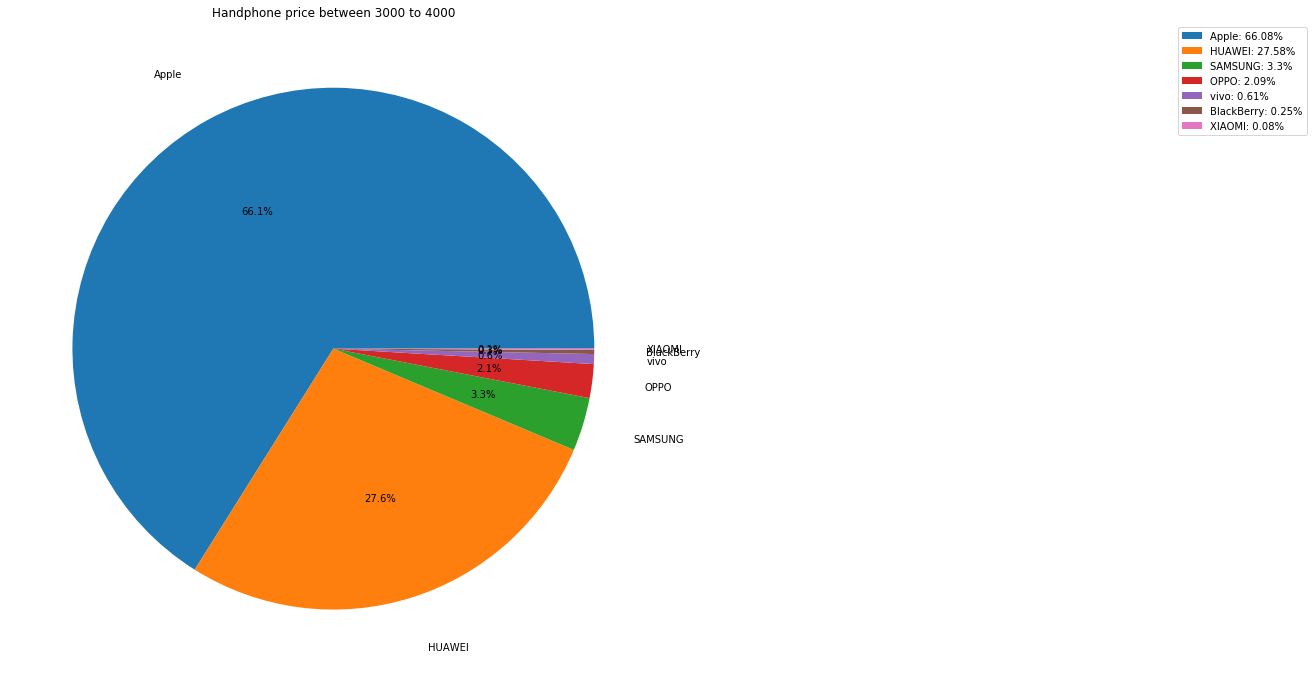

In [21]:
#绘制3000-4000元手机销量的占比扇形图
pie_plt=data[(data['price']>3000) & (data['price']<4000)].groupby(['brand']).sum()['comments'].sort_values(ascending=False)
fig,axes=plt.subplots(figsize=(12,12))
comment_sum=pie_plt.values.sum()
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
axes.pie(pie_plt.values,labels=pie_plt.index,labeldistance=1.2,autopct = '%3.1f%%')
axes.legend([pie_plt.index[i]+': '+str(percen[i])+"%" for i in range(len(percen))],loc='upper right',bbox_to_anchor=(1, 0, 1, 1))
axes.set_title('Handphone price between 3000 to 4000')
plt.show()

3000-4000元的手机被苹果占据大半壁江山，小米已经消失了。

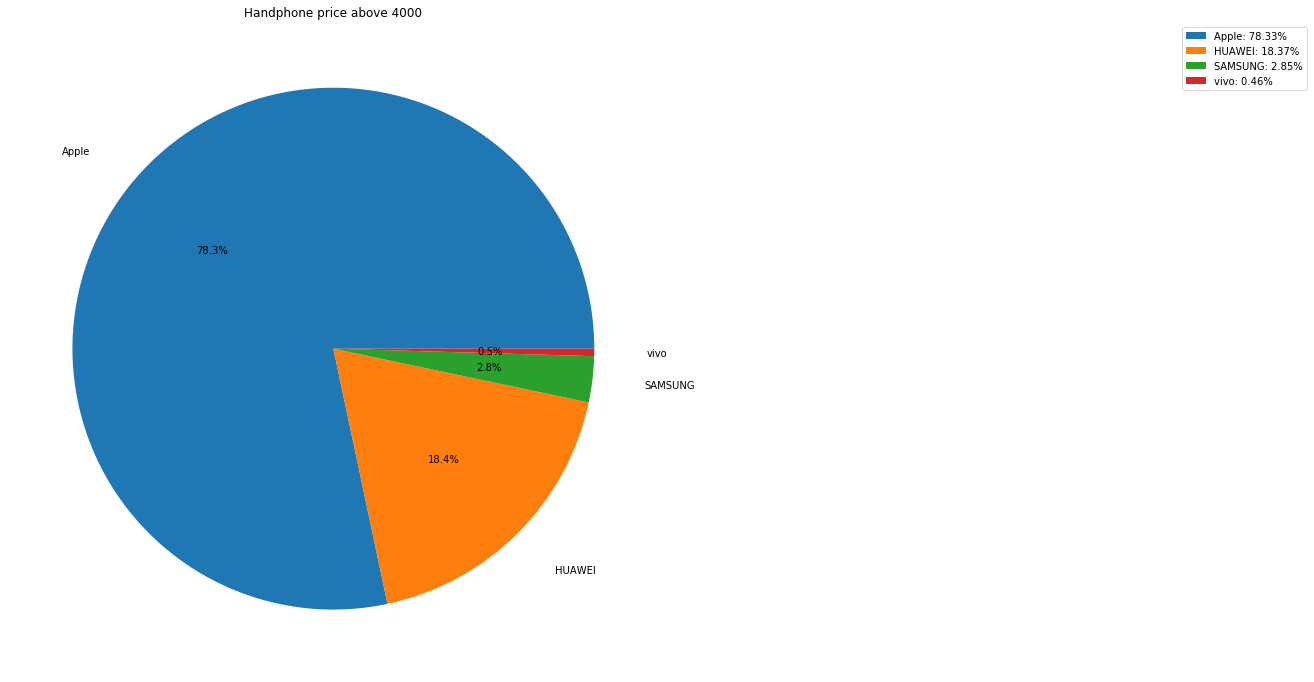

In [22]:
#绘制4000元以上手机销量的占比扇形图
pie_plt=data[(data['price']>4000)].groupby(['brand']).sum()['comments'].sort_values(ascending=False)
fig,axes=plt.subplots(figsize=(12,12))
comment_sum=pie_plt.values.sum()
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
axes.pie(pie_plt.values,labels=pie_plt.index,labeldistance=1.2,autopct = '%3.1f%%')
axes.legend([pie_plt.index[i]+': '+str(percen[i])+"%" for i in range(len(percen))],loc='upper right',bbox_to_anchor=(1, 0, 1, 1))
axes.set_title('Handphone price above 4000')
plt.show()

苹果的占领高端手机的强势地位依然保持，华为还是很有竞争力。

*3.绘制不同RAM配置手机价格*

Text(0.5, 1.0, 'Price Distribution Plot of phone with 2G RAM')

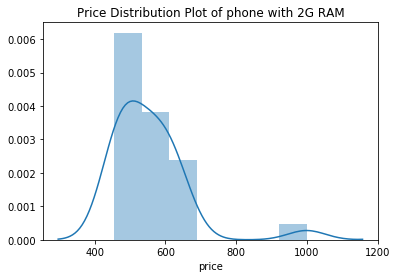

In [23]:
#绘制运行内存2G手机价格分布
hist_plot=data[data['RAM']==2.0]['price']
sns.distplot(hist_plot)
plt.title('Price Distribution Plot of phone with 2G RAM')

小内存就是便宜，手机用得也卡。

Text(0.5, 1.0, 'Price Distribution Plot of phone with 4G RAM')

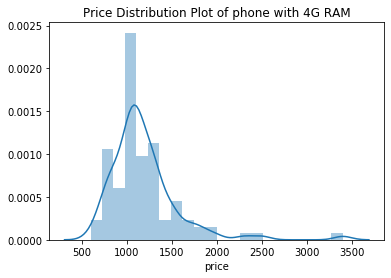

In [24]:
#绘制运行内存4G手机价格分布
hist_plot=data[data['RAM']==4.0]['price']
sns.distplot(hist_plot)
plt.title('Price Distribution Plot of phone with 4G RAM')

千元机大概也就是4G内存了。

Text(0.5, 1.0, 'Price Distribution Plot of phone with 8G RAM')

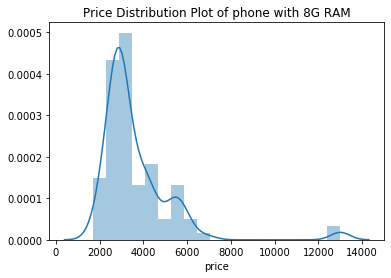

In [25]:
#绘制运行内存8G手机价格分布
hist_plot=data[data['RAM']==8.0]['price']
sns.distplot(hist_plot)
plt.title('Price Distribution Plot of phone with 8G RAM')

8G的手机需要3000元左右，这些数据为购置手机提供了决策依据。

## 3.总结

以[京东手机销售数据分析](https://www.kaggle.com/ted0001/dm05-998494/#data)为参考，经过数据获取、清洗、转换、分析、可视化，得到一些有价值的信息，如购买4G内存的手机预算在千元左右。这个过程中学习了python环境搭建和数据分析基本流程。你还能挖出什么信息呢？